# Christian Jay Baguio
## DS3A
### Data Mining and Application

# Imports

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
%matplotlib inline

import plotly.express as px

# Read Data

In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/JhunBrian/DS-312/main/materials/Linear%20Regression/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
#check for correlation by using corr func
correlation_matrix = df.corr()
correlation_matrix

C:\Users\ATARA\AppData\Local\Temp\ipykernel_16536\1311744694.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


### Check for data type in a dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [11]:
#Check for nan values inside the dataset
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [19]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Check if there is  a high correlation between the chosen column vs price 

In [9]:
correlation = df['sqft_living'].corr(df['price'])
print(f'Correlation between sqft_living and price: {correlation:.2f}')

Correlation between sqft_living and price: 0.70


# Perform a Simple Linear Regression to predict the price of a house given an independent variable.
* You must figure out what singular independent variable to use.

In [4]:
#I choose sqft_living as my independent variable and price as dependent variable
#sqft_living and price has a high correlation
X = df['sqft_living']
y = df['price']

#valuation of regression model
#this is useful to have an accurate estimates of the model's prediction quality
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state=30)

In [5]:
dframe = pd.DataFrame()
X_train_mean = X_train.mean() #Create a new variable name to pass the mean value of X train
y_train_mean = y_train.mean() #Create a new variable name to pass the mean value of y train

dframe['(x-x̄)'] = X_train - X_train_mean
dframe['(y-ȳ)'] = y_train - y_train_mean
dframe['(x-x̄)*(y-ȳ)'] = dframe['(x-x̄)'] * dframe['(y-ȳ)']
dframe['(x-x̄)²'] = dframe['(x-x̄)'] ** 2
dframe['(y-ȳ)²'] = dframe['(y-ȳ)'] ** 2
dframe

,(x-x̄),(y-ȳ),(x-x̄)*(y-ȳ),(x-x̄)²,(y-ȳ)²
13182,-1113.091382,58258.016599,-6.484650e+07,1.238972e+06,3.393996e+09
14863,-43.091382,-301741.983401,1.300248e+07,1.856867e+03,9.104822e+10
11234,-253.091382,-110741.983401,2.802784e+07,6.405525e+04,1.226379e+10
19105,-833.091382,-78741.983401,6.559927e+07,6.940413e+05,6.200300e+09
12544,-733.091382,25758.016599,-1.888298e+07,5.374230e+05,6.634754e+08
...,...,...,...,...,...
500,1096.908618,108258.016599,1.187492e+08,1.203209e+06,1.171980e+10
12077,-153.091382,-256741.983401,3.930499e+07,2.343697e+04,6.591645e+10
15277,1146.908618,230758.016599,2.646584e+08,1.315399e+06,5.324926e+10
4517,-153.091382,-181741.983401,2.782313e+07,2.343697e+04,3.303015e+10


In [6]:
r = dframe['(x-x̄)*(y-ȳ)'].sum() / np.sqrt(dframe['(x-x̄)²'].sum() * dframe['(y-ȳ)²'].sum())
print(f"Pearson Correlation Coefficient: {r}")

Pearson Correlation Coefficient: 0.7027679251241664


## Visualize the correlation 

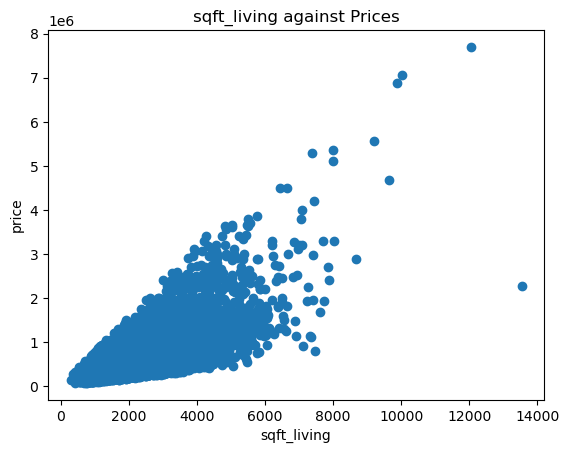

In [7]:
plt.scatter(X, y)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('sqft_living against Prices');

In [8]:
std_x = np.sqrt(dframe['(x-x̄)²'].sum() / len(dframe) - 1)
std_y = np.sqrt(dframe['(y-ȳ)²'].sum() / len(dframe) - 1)

# slope or the m
m = r * (std_y / std_x)
print(f"Slope: {m}")

Slope: 282.53976336863593


In [24]:
# y intercept or the c
c = y_train_mean - (m * X_train_mean)
print(f"Y Intercept: {c}")

Y Intercept: -46814.16283001634


# Linear Reg Function

In [25]:
def predict(x, m=m, c=c):
    return (m * x) + c

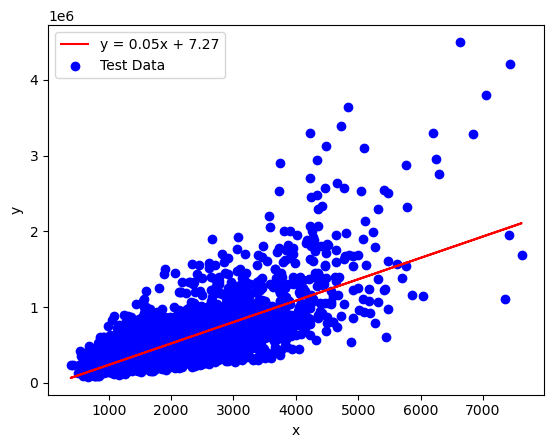

In [26]:
plt.plot(X_test, predict(X_test.values), label='y = 0.05x + 7.27', color='red')
plt.scatter(X_test, y_test, label='Test Data', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

In [27]:
def r2(X_test, y_test):
    y_pred = predict(X_test)
    return 1 - np.sum((y_test - y_pred) ** 2) / np.sum((y_test - y_test.mean()) ** 2)

def mse(X_test, y_test):
    y_pred = predict(X_test)
    sqrd_errors = (y_test - y_pred) ** 2
    return np.mean(sqrd_errors)

In [28]:
r2_result = r2(X_test, y_test)
mse_result = mse(X_test, y_test)

print(f"R2 score: {r2_result}")
print(f"MSE score: {mse_result}")

R2 score: 0.48798138963553395
MSE score: 64179679318.77767


### Alternative way for not having a long code in linear regression using sklearn 

In [13]:
X = df[['sqft_living']]
y = df['price']

regression_model = LinearRegression().fit(X, y)

# Get the coefficients
slope = regression_model.coef_[0]
intercept = regression_model.intercept_
print(f'Regression Equation: Income = {intercept:.2f} + {slope:.2f} * sqft_living')

Regression Equation: Income = -43580.74 + 280.62 * sqft_living


# Perform a Multiple Linear Regression to predict the price of a house using 5 independent variables.
* Decide which among the 20 variables to be used as the 5 independent variables.

In [18]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [41]:
X = df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']]
y = df['price']

X_train, X_test, y_train, y_test = tts(X,y, random_state=30)

reg = LinearRegression().fit(X_train, y_train)

In [42]:
reg.score(X_test, y_test)

0.5517541329605449

In [43]:
reg.score(X_train, y_train) #it's seems that my train score is lower than my test score even tho if I set the tts train_size to 0.8

0.5411753766019428

In [44]:
pred = reg.predict([[2657, 8, 2260, 2000, 4]])
print("Predicted Price Value: ", pred)

Predicted Price Value:  [617702.65720301]


C:\Users\ATARA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [45]:
fig = px.scatter_3d(df, x='sqft_living', y='grade', z = 'price', color='grade', title="3D Scatter Plot (sqft_living vs. grade vs. price)")
fig.show()

## Evaluate both models using MSE, RMSE and R2. Explain each metric.

In [49]:
#define prediction by passing the independent variables and let m be the reg coef or the slope and c would be the reg intercept
def predict(x, m=reg.coef_, c=reg.intercept_):
    return (m * x) + c

In [50]:
def r2(X_test, y_test):
    y_pred = predict(X_test)
    return 1 - np.sum((y_test - y_pred) ** 2) / np.sum((y_test - y_test.mean()) ** 2)

def mse(X_test, y_test):
    y_pred = predict(X_test)
    sqrd_errors = (y_test - y_pred) ** 2
    return np.mean(sqrd_errors)

In [51]:
r2_result = r2(X_test, y_test)
mse_result = mse(X_test, y_test)

print(f"R2 score: {r2_result}")
print(f"MSE score: {mse_result}")

C:\Users\ATARA\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



R2 score: 5                1.0
8                1.0
11               1.0
12               1.0
15               1.0
                ... 
bathrooms        1.0
grade            1.0
sqft_above       1.0
sqft_living      1.0
sqft_living15    1.0
Length: 5409, dtype: float64
MSE score: 5               NaN
8               NaN
11              NaN
12              NaN
15              NaN
                 ..
bathrooms       NaN
grade           NaN
sqft_above      NaN
sqft_living     NaN
sqft_living15   NaN
Length: 5409, dtype: float64
